# Netflix Content Analysis

## 1. Introduction

##Stakeholder Perspective:## 
As a Content Analyst at Netflix, my goal is to understand where we should invest in and promote content globally.

##Research Questions:##  
1. What are the dominant genres in each country?  
2. Which countries produce the most content on Netflix?

##Dataset:##
[Netflix Movies & TV Shows (Kaggle)](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Initial Exploration

Let’s check the structure, missing values, and general info about the dataset.

In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
# Fill missing values in 'country' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Create lists from comma-separated values
df['country_list'] = df['country'].str.split(', ')
df['genre_list'] = df['listed_in'].str.split(', ')

## 3. Exploratory Data Analysis (EDA)

Before diving into the specific research questions, we explore the dataset to uncover general trends, detect anomalies, and understand the overall structure.  
This section includes:
- Distribution of content types (Movies vs TV Shows)
- Distribution of content ratings
- Number of titles added to Netflix over time
- Length of content descriptions
- Top countries with the most titles


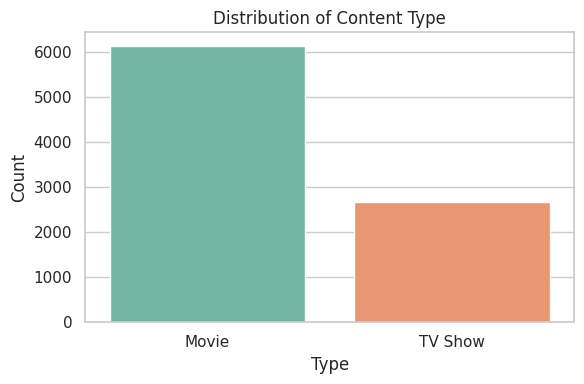

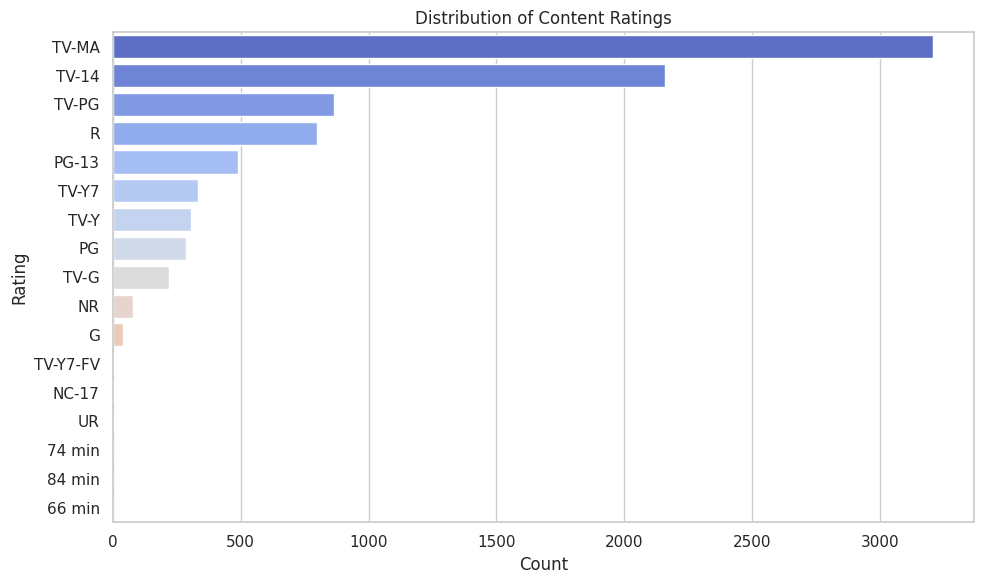

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


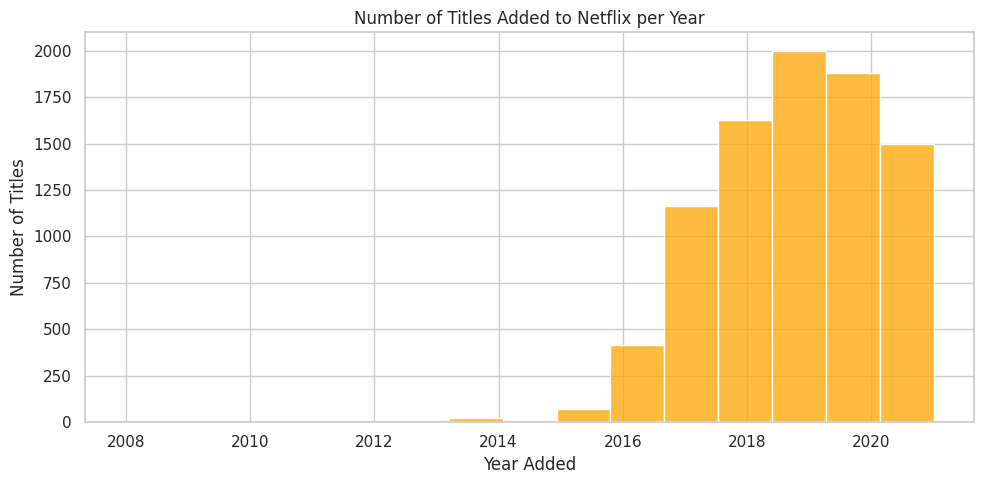

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


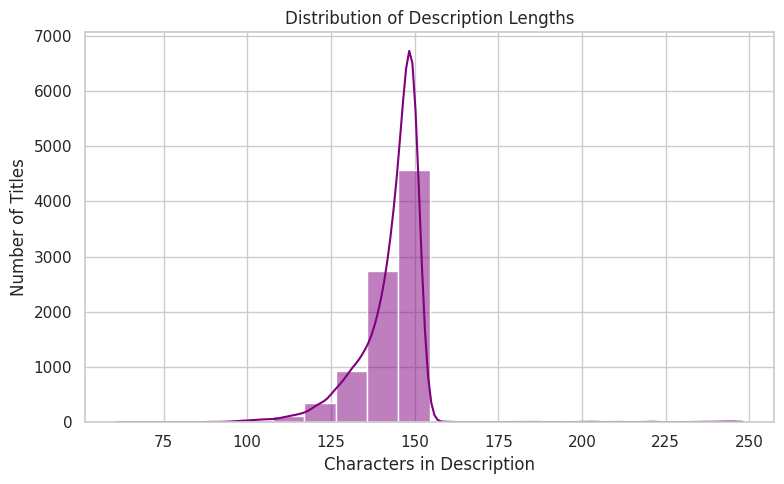

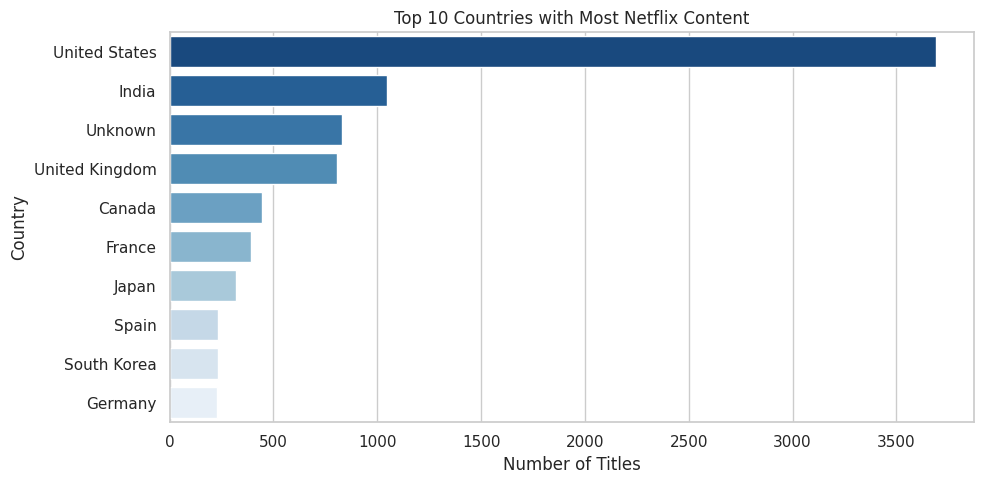

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set(style="whitegrid")

# 1. Type Distribution (Movies vs TV Shows)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.ylabel('Count')
plt.xlabel('Type')
plt.tight_layout()
plt.show()

# 2. Rating Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# 3. Titles Added per Year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(10,5))
sns.histplot(df['year_added'].dropna(), bins=15, kde=False, color='orange')
plt.title('Number of Titles Added to Netflix per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

# 4. Description Length Distribution
df['description_length'] = df['description'].str.len()
plt.figure(figsize=(8,5))
sns.histplot(df['description_length'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribution of Description Lengths')
plt.xlabel('Characters in Description')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

# 5. Top Countries with Most Titles (General View)
df_expanded = df.explode('country_list')
top_countries = df_expanded['country_list'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### 4. Research Question 1: Dominant Genres per Country

We will identify the top 3 most frequent genres per country based on the dataset.

In [5]:
from collections import Counter

genres_per_country = {}

for _, row in df.iterrows():
    for country in row['country_list']:
        genres_per_country.setdefault(country, []).extend(row['genre_list'])

# Get top 3 genres per country
top_genres_by_country = {
    c: Counter(genres).most_common(3)
    for c, genres in genres_per_country.items()
}

# Display a few examples
import itertools
list(itertools.islice(top_genres_by_country.items(), 10))

[('United States',
  [('Dramas', 835), ('Comedies', 680), ('Documentaries', 511)]),
 ('South Africa',
  [('International Movies', 39), ('Dramas', 21), ('Comedies', 17)]),
 ('Unknown',
  [('International TV Shows', 223),
   ('International Movies', 209),
   ('Dramas', 110)]),
 ('India',
  [('International Movies', 864), ('Dramas', 662), ('Comedies', 323)]),
 ('Ghana',
  [('Dramas', 5), ('International Movies', 5), ('Independent Movies', 2)]),
 ('Burkina Faso',
  [('Dramas', 1), ('Independent Movies', 1), ('International Movies', 1)]),
 ('United Kingdom',
  [('British TV Shows', 225), ('Dramas', 196), ('International Movies', 168)]),
 ('Germany', [('International Movies', 94), ('Dramas', 80), ('Comedies', 42)]),
 ('Ethiopia',
  [('Dramas', 1), ('Independent Movies', 1), ('International Movies', 1)]),
 ('Czech Republic',
  [('International Movies', 10), ('Dramas', 7), ('Action & Adventure', 5)])]

In [6]:
# Top 5 countries with the most content (excluding 'Unknown')
top_countries = [
    country for country, count in top_10_countries 
    if country != 'Unknown'
][:5]

NameError: name 'top_10_countries' is not defined

In [ ]:
rows = []

for country in top_countries:
    top_genres = top_genres_by_country.get(country, [])
    for genre, count in top_genres:
        rows.append({
            'country': country,
            'genre': genre,
            'count': count
        })

genres_df = pd.DataFrame(rows)
genres_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=genres_df, x='genre', y='count', hue='country')
plt.title('Top 3 Genres per Top 5 Countries')
plt.ylabel('Number of Appearances')
plt.xlabel('Genre')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [ ]:
# Filter data for India
india_genres = genres_per_country['India']
top_india = Counter(india_genres).most_common(6)
labels, values = zip(*top_india)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top Genres in India')
plt.axis('equal')
plt.show()

In [ ]:
# Count top genres for United States
us_genres = genres_per_country['United States']
top_us = Counter(us_genres).most_common(6)
labels, values = zip(*top_us)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top Genres in United States')
plt.axis('equal')
plt.show()

##### 5. Research Question 2: Countries with the Most Content

Let’s find out which countries produce the most content on Netflix.

In [ ]:
from collections import Counter

country_counter = Counter(
    country for country_list in df['country_list'] for country in country_list
)

top_10_countries = country_counter.most_common(10)
top_10_df = pd.DataFrame(top_10_countries, columns=['country', 'count'])
top_10_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_df, x='count', y='country', palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Use previously expanded data
df_expanded = df.explode('country_list')

# Count number of titles per country
country_counts = df_expanded['country_list'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Remove 'Unknown' country if exists
country_counts = country_counts[country_counts['country'] != 'Unknown']

# Plot
fig = px.treemap(country_counts.head(20), 
                 path=['country'], 
                 values='count',
                 title='Top 20 Countries by Number of Netflix Titles',
                 color='count',
                 color_continuous_scale='Reds')

fig.show()

## 6. Conclusion & Recommendations

Based on my analysis:
- The U.S. dominates Netflix's content volume.
- Genre preferences vary by country (e.g., India favors International Movies and Dramas).
- Regional genre data can help optimize content investment.

Netflix should localize content strategies by promoting top genres in each country and investing in growing regions.
